In [1]:
import scanpy as sc
from anndata import AnnData
import numpy as np

# import requires setting a PYTHONPATH with the data_import directory
import h5ad_preparation as prep
import pandas as pd

20230112-215931.485 54245 INFO root:20 local study files stored in: /Users/sgpeo/projects/cellenium/cellenium/scratch


In [2]:
url = "https://figshare.com/ndownloader/files/23872526"
adata = prep.get_h5ad_from_url(url, "tabula_muris_senis_liver")

/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [3]:
prep.jupyter_h5ad_overview(adata)

,FACS.selection,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,sex,subtissue,tissue,n_genes,n_counts,louvain,leiden
index,,,,,,,,,,,,,,,
A10_B000767_B009945_S10.mm10-plus-4-0,Viable,18m,A10_B000767,hepatocyte,nan,nan,facs,18_46_F,female,Liver non-hepato/SCs,Liver,880,3425697.0,7,7
A10_D045313_B009942_S10.mm10-plus-4-0,Viable,18m,A10_D045313,hepatocyte,nan,nan,facs,18_45_M,male,Liver non-hepato/SCs_st,Liver,1151,1517490.0,8,4
A11_B000767_B009945_S11.mm10-plus-4-0,Viable,18m,A11_B000767,myeloid leukocyte,nan,nan,facs,18_46_F,female,Liver non-hepato/SCs,Liver,2946,7940638.0,3,12
A11_B001247_B009941_S11.mm10-plus-4-0,Viable,18m,A11_B001247,endothelial cell of hepatic sinusoid,nan,nan,facs,18_46_F,female,Liver non-hepato/SCs_st,Liver,817,377537.0,13,16
A11_B002688_B009944_S11.mm10-plus-4-0,Viable,18m,A11_B002688,endothelial cell of hepatic sinusoid,nan,nan,facs,18_53_M,male,Liver non-hepato/SCs,Liver,2933,2801436.0,9,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P5.MAA000907.3_11_M.1.1-1-1,nan,3m,P5.MAA000907.3_11_M.1.1,endothelial cell of hepatic sinusoid,CL:1000398,nan,facs,3_11_M,male,Non-hepatocytes,Liver,1222,104731.0,13,16
P6.MAA000907.3_11_M.1.1-1-1,nan,3m,P6.MAA000907.3_11_M.1.1,B cell,CL:0000236,B cell,facs,3_11_M,male,Non-hepatocytes,Liver,1902,275417.0,6,1
P7.MAA000907.3_11_M.1.1-1-1,nan,3m,P7.MAA000907.3_11_M.1.1,endothelial cell of hepatic sinusoid,CL:0000182,nan,facs,3_11_M,male,Non-hepatocytes,Liver,1021,133609.0,13,16


,n_cells,means,dispersions,dispersions_norm,highly_variable
index,,,,,
0610005C13Rik,3939,0.594498,1.915840,-0.170678,False
0610007C21Rik,61891,0.831195,1.831768,-0.568851,False
0610007L01Rik,36115,0.344973,1.605082,0.522063,True
0610007N19Rik,19591,0.010113,1.856694,0.641167,False
0610007P08Rik,12581,0.058863,1.219318,0.339457,False
...,...,...,...,...,...
Zyg11a,276,0.003285,1.313830,0.384195,False
Zyg11b,23165,0.164135,1.517642,0.480673,False
Zyx,58021,0.834286,2.465299,0.473558,False


(2859, 22966)

<2859x22966 sparse matrix of type '<class 'numpy.float32'>'
	with 7496584 stored elements in Compressed Sparse Row format>

(2859, 22966)

OverloadedDict, wrapping:
	{'age_colors': array(['#e1f3b2', '#97d6b9', '#1f80b8'], dtype=object), 'cell_ontology_class_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78'],
      dtype=object), 'leiden': {'params': {'n_iterations': array([-1]), 'random_state': array([0]), 'resolution': array([1])}}, 'louvain': {'params': {'random_state': array([0])}}, 'neighbors': {'params': {'method': array(['umap'], dtype=object), 'metric': array(['euclidean'], dtype=object), 'n_neighbors': array([15]), 'n_pcs': array([5])}}, 'pca': {'variance': array([186.28151  , 147.22552  ,  92.12129  ,  83.787506 ,  43.631996 ,
        33.945435 ,  23.190567 ,  18.865063 ,  16.100765 ,  16.004524 ,
        14.072803 ,  13.654055 ,  13.253153 ,  12.359078 ,  12.345741 ,
        10.885196 ,  10.544399 ,  10.005813 ,   9.697368 ,   9.447956 ,
         9.083282 ,   8.806979 ,   8.614809 ,   8.456782 ,   8.200341 ,
         8.1

20230112-215932.875 54245 INFO root:123 make_norm_expression: no transformations necessary
/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


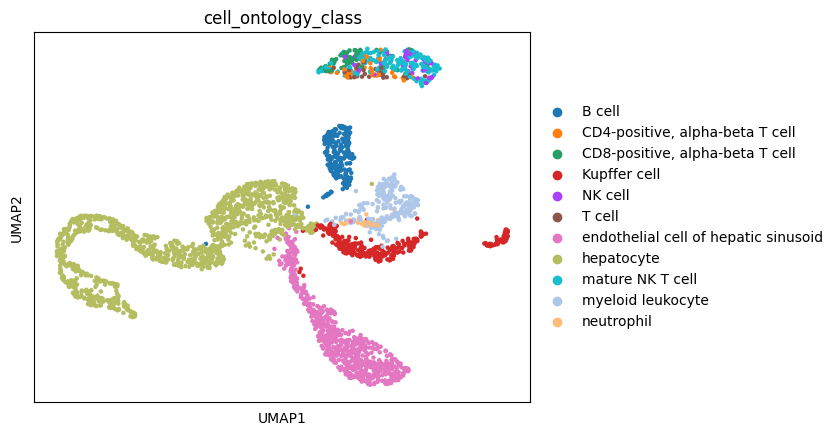

In [4]:
prep.remove_raw_and_layers(adata)
prep.make_sparse(adata)
prep.filter_outliers(adata)
prep.make_norm_expression(adata)

prep.add_umap(adata)
prep.density_sample_umap(adata)
sc.pl.umap(adata, color="cell_ontology_class")

In [5]:
prep.calculate_differentially_expressed_genes(adata, ["cell_ontology_class", "free_annotation", "louvain", "leiden"])

diff.exp. genes:  75%|███████████████████████████████████████████████████▊                 | 3/4 [00:08<00:02,  2.96s/it]/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_n

,names,scores,logfoldchanges,pvals,pvals_adj,ref_attr_value,cmp_attr_value,attribute_name
0,Apoa1,42.989605,3.588933,0.000000,0.000000,hepatocyte,_OTHERS_,cell_ontology_class
1,Serpina1c,42.848248,4.182104,0.000000,0.000000,hepatocyte,_OTHERS_,cell_ontology_class
2,Ttr,42.818401,4.377194,0.000000,0.000000,hepatocyte,_OTHERS_,cell_ontology_class
3,Rbp4,42.777393,4.461710,0.000000,0.000000,hepatocyte,_OTHERS_,cell_ontology_class
4,Apoa2,42.630615,3.719623,0.000000,0.000000,hepatocyte,_OTHERS_,cell_ontology_class
...,...,...,...,...,...,...,...,...
5151,Foxp1,1.778590,2.084637,0.075307,0.795187,21,_OTHERS_,leiden
5152,H2-DMb1,1.679751,1.263609,0.093006,0.839313,21,_OTHERS_,leiden
5153,Rps18,1.675878,1.154838,0.093762,0.841103,21,_OTHERS_,leiden
5154,Lsp1,1.659882,1.618269,0.096938,0.847412,21,_OTHERS_,leiden


In [6]:
prep.set_cellenium_metadata(
    adata,
    title="Tabula Muris Senis - Liver",
    description="Mouse liver from the Tabula Muris Senis Consortium",
    taxonomy_id=10090,
    ncit_tissue_ids=["C12392"],
    mesh_disease_ids=[],
    X_pseudolayer_name="norm_log_expression",
    main_sample_attributes=["cell_ontology_class", "free_annotation"],
)

# final h5ad file

In [7]:
adata.write(prep.basedir.joinpath("tabula_muris_senis_liver.h5ad"))
prep.jupyter_h5ad_overview(adata)

,FACS.selection,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,sex,subtissue,tissue,n_genes,n_counts,louvain,leiden
index,,,,,,,,,,,,,,,
A10_B000767_B009945_S10.mm10-plus-4-0,Viable,18m,A10_B000767,hepatocyte,nan,nan,facs,18_46_F,female,Liver non-hepato/SCs,Liver,880,3425697.0,7,7
A10_D045313_B009942_S10.mm10-plus-4-0,Viable,18m,A10_D045313,hepatocyte,nan,nan,facs,18_45_M,male,Liver non-hepato/SCs_st,Liver,1151,1517490.0,8,4
A11_B000767_B009945_S11.mm10-plus-4-0,Viable,18m,A11_B000767,myeloid leukocyte,nan,nan,facs,18_46_F,female,Liver non-hepato/SCs,Liver,2946,7940638.0,3,12
A11_B001247_B009941_S11.mm10-plus-4-0,Viable,18m,A11_B001247,endothelial cell of hepatic sinusoid,nan,nan,facs,18_46_F,female,Liver non-hepato/SCs_st,Liver,817,377537.0,13,16
A11_B002688_B009944_S11.mm10-plus-4-0,Viable,18m,A11_B002688,endothelial cell of hepatic sinusoid,nan,nan,facs,18_53_M,male,Liver non-hepato/SCs,Liver,2933,2801436.0,9,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P5.MAA000907.3_11_M.1.1-1-1,nan,3m,P5.MAA000907.3_11_M.1.1,endothelial cell of hepatic sinusoid,CL:1000398,nan,facs,3_11_M,male,Non-hepatocytes,Liver,1222,104731.0,13,16
P6.MAA000907.3_11_M.1.1-1-1,nan,3m,P6.MAA000907.3_11_M.1.1,B cell,CL:0000236,B cell,facs,3_11_M,male,Non-hepatocytes,Liver,1902,275417.0,6,1
P7.MAA000907.3_11_M.1.1-1-1,nan,3m,P7.MAA000907.3_11_M.1.1,endothelial cell of hepatic sinusoid,CL:0000182,nan,facs,3_11_M,male,Non-hepatocytes,Liver,1021,133609.0,13,16


,n_cells,means,dispersions,dispersions_norm,highly_variable
index,,,,,
0610005C13Rik,805,0.594498,1.915840,-0.170678,False
0610007C21Rik,1281,0.831195,1.831768,-0.568851,False
0610007L01Rik,846,0.344973,1.605082,0.522063,True
0610007N19Rik,54,0.010113,1.856694,0.641167,False
0610007P08Rik,308,0.058863,1.219318,0.339457,False
...,...,...,...,...,...
Zyg11a,63,0.003285,1.313830,0.384195,False
Zyg11b,649,0.164135,1.517642,0.480673,False
Zyx,1223,0.834286,2.465299,0.473558,False


(2859, 17098)

<2859x17098 sparse matrix of type '<class 'numpy.float32'>'
	with 7493318 stored elements in Compressed Sparse Row format>

OverloadedDict, wrapping:
	{'age_colors': array(['#e1f3b2', '#97d6b9', '#1f80b8'], dtype=object), 'cell_ontology_class_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78'],
      dtype=object), 'leiden': {'params': {'n_iterations': array([-1]), 'random_state': array([0]), 'resolution': array([1])}}, 'louvain': {'params': {'random_state': array([0])}}, 'neighbors': {'params': {'method': array(['umap'], dtype=object), 'metric': array(['euclidean'], dtype=object), 'n_neighbors': array([15]), 'n_pcs': array([5])}}, 'pca': {'variance': array([186.28151  , 147.22552  ,  92.12129  ,  83.787506 ,  43.631996 ,
        33.945435 ,  23.190567 ,  18.865063 ,  16.100765 ,  16.004524 ,
        14.072803 ,  13.654055 ,  13.253153 ,  12.359078 ,  12.345741 ,
        10.885196 ,  10.544399 ,  10.005813 ,   9.697368 ,   9.447956 ,
         9.083282 ,   8.806979 ,   8.614809 ,   8.456782 ,   8.200341 ,
         8.1